In [ ]:
!pip uninstall torch torchvision -y
!pip install torch==1.4.0 torchvision==0.5.0

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate

 95% 122M/128M [00:01<00:00, 76.6MB/s]
100% 128M/128M [00:01<00:00, 88.6MB/s]
 99% 1.13G/1.15G [00:12<00:00, 151MB/s]
100% 1.15G/1.15G [00:12<00:00, 95.8MB/s]


/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:217: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")


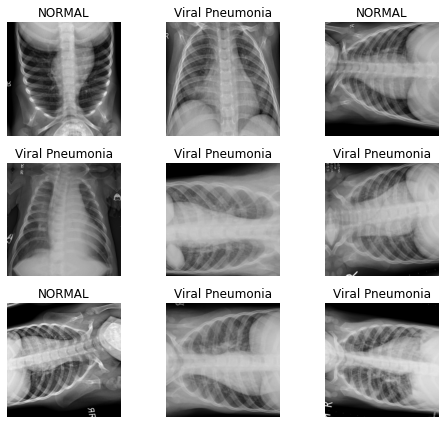

In [ ]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

!pip install kaggle
! mkdir ~/.kaggle
! cp /content/kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d theroyakash/covid19
!unzip -q  /content/covid19.zip


!kaggle datasets download -d tawsifurrahman/covid19-radiography-database
!unzip -q /content/covid19-radiography-database



path = Path("/content/COVID-19 Radiography Database")
path.ls() # output >>> ['test', 'labels.txt', 'train']

tfms = get_transforms(do_flip=True, flip_vert=True)
data = ImageList.from_folder(path) .random_split_by_pct() .label_from_folder() .transform(tfms,
                                                                                          size=224) .databunch()
data.normalize()

data.show_batch(rows=3, figsize=(7,6))


In [ ]:
#path_anno = path/'annotations'
path_img = path/'COVID-19'

fnames = get_image_files(path_img)
fnames[:5]

np.random.seed(2)
#pat = r'/([^/]+)_\d+.jpg$'


print(data.classes)
len(data.classes),data.c

['COVID-19', 'NORMAL', 'Viral Pneumonia']


(3, 3)

# train

In [ ]:

import fastai
import torch.nn as nn 
import torch 
import numpy 
%matplotlib inline

from torch.autograd import Variable
from torchvision import models
#from fastai import conv_learner
import numpy as np
import matplotlib.pyplot as plt

%pylab inline
# pylab.rcParams['figure.figsize'] = (15, 15)



Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random', 'uniform', 'pad', 'copy', 'subplots', '__version__', 'array', 'partition']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=(accuracy , error_rate))

In [ ]:
arch = models.resnet50
sz = 256
learn = cnn_learner(data , arch)

In [ ]:
model = learn.model

In [ ]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,time
0,0.773633,0.899581,01:34


In [ ]:
learn.save('stage-1')

In [ ]:
# Some Helper functions
from PIL import Image
def image_loader(path, expand_dim=False):
    img = Image.open(path)
    img = img.resize((256, 256))
    img = np.array(img, dtype=np.float32)
    img = np.einsum('ijk->kij', img)
    if expand_dim:
        img = img[None]
    # convert to torch 
    img = torch.from_numpy(img)
    return img 

def return_sequential(layer_num, model):
    return nn.Sequential(
            *list(model.children())[:layer_num]
        )

class get_activation_layer(nn.Module):
    def __init__(self, model, total_layers):
        super().__init__()
        self.model = model
        self.total_layers = total_layers
        self.layer_models = []
        for i in range(self.total_layers):
             self.layer_models.append(return_sequential(i, self.model))
    def forward(self, x):
        self.outputs = []
        for i in range(self.total_layers):
            self.outputs.append(self.layer_models[i](x))
        return self.outputs


In [ ]:
tmp_model = get_activation_layer(model, 16)

In [ ]:
# This writes layer outputs to file

def visulaize_layers(outputs):
    for index, layer in enumerate(outputs):
        print(f"starting index {index}")
        features = layer.data
        size_plot = features.shape[1]
        if size_plot % 2 != 0:
            size_plot += 1
        original_size = np.int(np.ceil(np.sqrt(size_plot)))
        f, axarr = plt.subplots(original_size + 1, original_size + 1)
        i, j = 0,0
        counter = 1
        for blocks in features:
            for block in blocks:
                counter += 1
                x = block.cpu().numpy()
                if counter % original_size == 0:
                    i += 1
                    j = 0 

                axarr[i,j].imshow(x)
                j += 1
        counter = 0
        print(f'layer {index} done')
        #f.savefig(f'layer_op1/output{index}.jpg')
        f.savefig(f'{path}/layer_op/output{index}.jpg')
        print('image generated')

In [ ]:
!mkdir '/content/COVID-19 Radiography Database/layer_op'

In [ ]:
path = '/content/COVID-19 Radiography Database/'

i = image_loader('/content/COVID-19 Radiography Database/COVID-19/COVID-19 (1).png', expand_dim=True)
i = i.cuda()

#layer_outputs = tmp_model(Variable(i))

In [ ]:
nr_layers = 10
tmp_model = get_activation_layer(model, nr_layers)
layer_outputs = tmp_model(Variable(i))
visulaize_layers(layer_outputs)

size of layer:  torch.Size([2048, 8, 8])
size_of_activation:  torch.Size([8, 8])


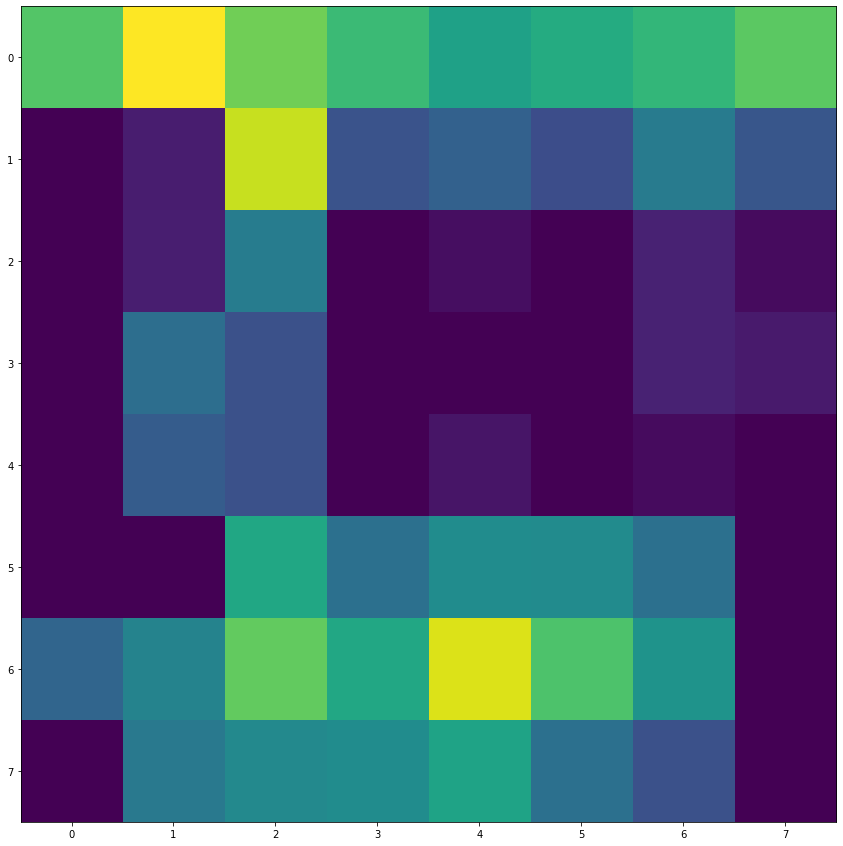

In [ ]:
k = 1 # the number of the layer
j = 3 # the number of the filter 

f = layer_outputs[k].data[0][j]

print('size of layer: ', shape(layer_outputs[k].data[0]))
print('size_of_activation: ',shape(f))

# display the <j-th> filter activation from <k-th> layer
imshow(f.cpu().numpy())

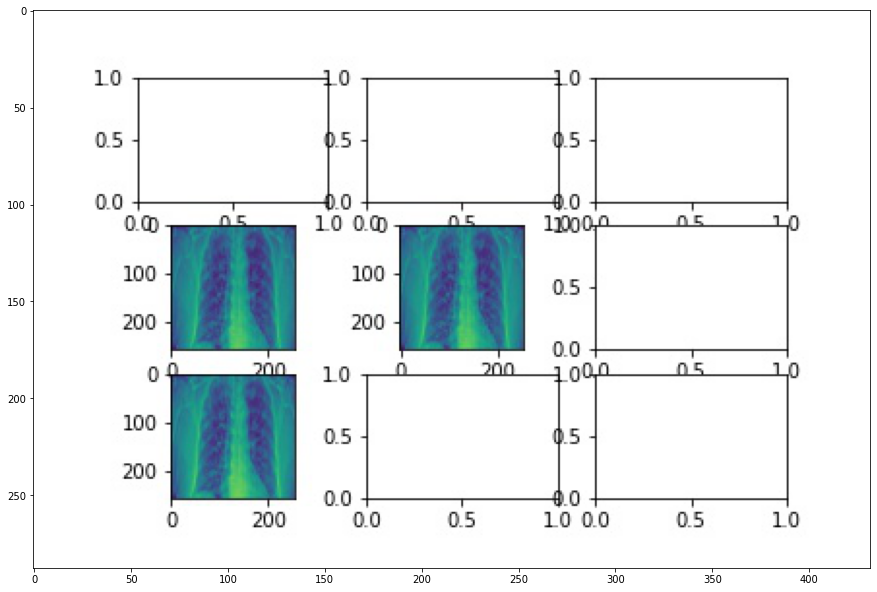

In [ ]:
im = plt.imread('/content/COVID-19 Radiography Database/layer_op/output0.jpg')
pylab.rcParams['figure.figsize'] = (15,15)
plt.imshow(im)

In [ ]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
# This file contains all the main external libs we'll use
from fastai import *
from typing import List, Union
from pathlib import Path


In [ ]:
#tfms_from_model -- model based image transforms (preprocessing stats)
arch=resnet50
data = ImageClassifierData.from_paths(path, test_name='test', test_with_labels=True, tfms=tfms_from_model(arch, sz))

#precompute=True to save conv layer activations! pass False if you want to run the data viz below
learner = ConvLearner.pretrained(f=arch, data=data, precompute=False)

In [ ]:
learner.fit(0.01, 15)

In [ ]:
learner.load('tennis_v_bball.lrnr')

In [ ]:
probs = np.exp(learner.predict())
probs

In [ ]:
#TODO: improve
def display_images(images:List[Union[Path, np.ndarray]], columns:int, titles:List[str]=None, figsize=None) -> None:
    if not titles:
        titles = [f'Image {i+1}' for i in range(len(images))]
    rows = len(images) // columns + int(len(images) % columns > 0)
    if figsize is None:
        figsize = (60,60)
    plt.figure(figsize=figsize)
    for i, (image, title) in enumerate(zip(images, titles)):
        if isinstance(image, Path):
            image = np.array(PIL.Image.open(image))
        plt.subplot(rows, columns, i+1)
        plt.imshow(image)
        plt.title(title, fontsize=10*columns)
        plt.axis('off')

In [ ]:
#val images
predictions = probs.argmax(axis=1)
images, titles = [], []
for prob, pclass, fname in zip(probs, predictions,  data.val_ds.fnames):
    images.append(path / fname)
    titles.append(f'{fname} -- {prob[pclass]:.{3}f} ({data.classes[pclass]})')
    
display_images(images, 4, titles)

In [ ]:
test_probs = np.exp(learner.predict(is_test=True))
test_predictions = test_probs.argmax(axis=1)

#test images
images, titles = [],[]
for prob, pclass, fname in zip(test_probs, test_predictions,  data.test_ds.fnames):
    images.append(path / fname)
    titles.append(f'{fname} -- {prob[pclass]:.{3}f} ({data.classes[pclass]})')
    
display_images(images, 4, titles)

# Looking into model layers

In [ ]:
a = list(learn.model.parameters())
a

[Parameter containing:
 tensor([[[[ 5.4109e-03, -6.9092e-03,  7.8839e-03,  ...,  4.9072e-02,
             3.0660e-02,  2.5398e-02],
           [ 4.1081e-02,  3.1296e-02,  3.2265e-02,  ...,  3.3145e-02,
             2.9754e-02,  4.1735e-02],
           [ 4.9519e-03, -3.1705e-02, -6.1310e-02,  ..., -9.7493e-02,
            -1.1601e-01, -1.2191e-01],
           ...,
           [-1.2287e-02, -2.4841e-02, -9.3052e-03,  ...,  1.7113e-02,
             2.4631e-03,  1.6726e-02],
           [ 3.9117e-03,  4.4537e-03,  3.6315e-02,  ...,  1.0371e-01,
             7.3973e-02,  5.9085e-02],
           [ 1.6784e-02,  8.8902e-03,  3.1312e-02,  ...,  9.6964e-02,
             8.3749e-02,  9.6970e-02]],
 
          [[-7.7192e-03, -8.7711e-03,  1.4143e-02,  ...,  3.3901e-02,
             2.5483e-02,  2.4275e-02],
           [ 5.3961e-02,  4.4677e-02,  3.4326e-02,  ...,  1.3392e-02,
             1.9135e-02,  3.7995e-02],
           [ 1.0251e-03, -5.4513e-02, -1.0225e-01,  ..., -1.9231e-01,
            -1.9

In [ ]:
len(a)

116

In [ ]:
b = a[-1]
b

Parameter containing:
tensor([-0.0703,  0.0361,  0.0699], device='cuda:0', requires_grad=True)

In [ ]:
b = a[-6]
b

Parameter containing:
tensor([[-0.0514,  0.0549, -0.0381,  ..., -0.0190, -0.0048,  0.0723],
        [ 0.0308, -0.0801, -0.0404,  ..., -0.0557, -0.0595,  0.0290],
        [-0.0175, -0.0565, -0.0719,  ...,  0.0348,  0.0334,  0.0390],
        ...,
        [ 0.0109,  0.0105, -0.0156,  ..., -0.0121, -0.0315, -0.0605],
        [-0.0144,  0.0223,  0.1238,  ...,  0.1049, -0.0356, -0.1201],
        [ 0.0709,  0.0215,  0.0012,  ..., -0.0956,  0.0473, -0.0577]],
       device='cuda:0', requires_grad=True)

In [ ]:
b.dtype

torch.float32

In [ ]:
b = a[3]
c = b.cpu()
d = c.detach().numpy()
d.shape

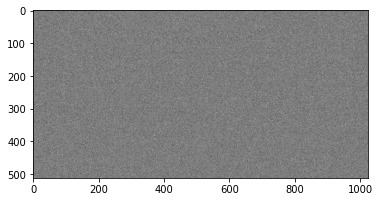

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(d, cmap='gray')
plt.show()

In [ ]:
list(learn.model.parameters())[-5]

In [ ]:
from fastai.callbacks import *

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=(accuracy , error_rate) , callback_fns=ActivationStats)

In [ ]:
learn.fit(1)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.635897,1.000100,0.771084,0.228916,01:34


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f1ff07c4f98>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f1ff07c4f98>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/l

In [ ]:
len(learn.data.train_dl),len(learn.activation_stats.modules)

(36, 76)

In [ ]:
learn.activation_stats.stats.shape

torch.Size([2, 76, 36])

In [ ]:
a2 = learn.activation_stats.modules
a2

[Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False),
 BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False),
 BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False),
 BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False),
 BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False),
 BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False),
 BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 Conv2d(64, 64, kernel_size=(

In [ ]:
a = learn.activation_stats.modules[1]

In [ ]:
for i in learn.activation_stats.modules:
  if "Conv2d" in i:
    print(i)

In [ ]:
learn.activation_stats.stats.shape

torch.Size([2, 76, 36])

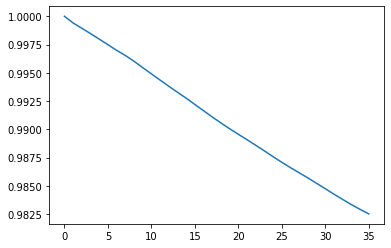

In [ ]:
plt.plot(learn.activation_stats.stats[1][-2].numpy());

In [ ]:
a1 = learn.activation_stats.stats

In [ ]:
a1.shape

torch.Size([2, 76, 36])

In [ ]:
a1[:,:,2]

tensor([[-2.9929e-03,  1.9965e-01, -7.4166e-01, -2.5752e-02,  1.7913e-02,
          3.6651e-02, -7.0602e-01, -5.2984e-02, -2.3372e-02,  2.0403e-02,
         -3.4632e-01, -1.1773e-01, -9.0358e-03,  3.5650e-02, -1.4619e-01,
         -5.9015e-02, -9.4533e-02,  6.2875e-02,  1.6323e-03,  6.2875e-02,
         -1.6050e-01, -1.1925e-01, -7.6989e-02, -5.4164e-02, -1.3248e-01,
         -1.9233e-01, -3.1390e-02, -6.0701e-02, -3.7260e-01, -2.3699e-01,
         -1.8829e-02, -4.3222e-02, -2.9143e-01, -8.5037e-02, -6.7148e-02,
          2.5350e-02, -3.0683e-02,  2.5350e-02, -2.9156e-01, -1.7210e-01,
         -4.6460e-02, -7.2220e-02, -3.8634e-01, -2.1826e-01, -3.2930e-02,
         -6.0405e-02, -3.8976e-01, -2.2594e-01, -3.4351e-02, -8.8751e-02,
         -4.0563e-01, -2.3198e-01, -3.4013e-02, -1.1082e-01, -3.0763e-01,
         -2.2833e-01, -5.2557e-02, -1.7633e-01, -1.5114e-01, -1.9328e-01,
         -4.5766e-02, -9.0973e-02,  5.7631e-03, -9.0973e-02, -1.4660e+00,
         -2.1310e-01, -1.9771e-02, -1.

In [ ]:
a1[1]

tensor([[1.1320, 1.1281, 1.1834,  ..., 1.0811, 1.1517, 1.1456],
        [0.4112, 0.4111, 0.4111,  ..., 0.4110, 0.4110, 0.4110],
        [0.9594, 0.9648, 0.9552,  ..., 0.9583, 0.9485, 0.9615],
        ...,
        [1.6390, 1.6537, 1.6982,  ..., 2.5911, 2.5739, 2.5811],
        [1.0000, 0.9994, 0.9989,  ..., 0.9833, 0.9829, 0.9825],
        [2.1749, 2.6035, 3.5567,  ..., 4.7317, 4.6796, 4.7234]])

In [ ]:
b = a1[:,:,2]
c = b.cpu()
d = c.detach().numpy()
d.shape

(2, 76)

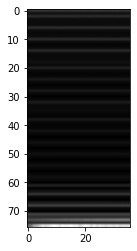

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(d, cmap='gray')
plt.show()

In [ ]:
outputs= []
def hook(module, input, output):
    outputs.append(output)

res50_model = models.resnet50(pretrained=True)
res50_model.layer4[0].conv2.register_forward_hook(hook)
out = res50_model(res)
out = res50_model(res1)
print(outputs)


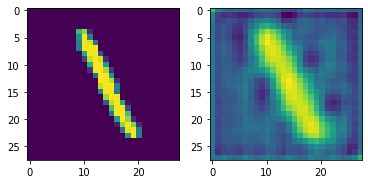

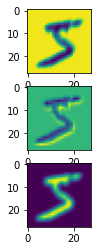

In [ ]:
#https://discuss.pytorch.org/t/visualize-feature-map/29597

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader

import torchvision.transforms as transforms
import torchvision.datasets as datasets

import matplotlib.pyplot as plt


class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 3, 3, 1, 1)
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(3, 6, 3, 1, 1)
        self.pool2 = nn.MaxPool2d(2)
        
        self.conv_trans1 = nn.ConvTranspose2d(6, 3, 4, 2, 1)
        self.conv_trans2 = nn.ConvTranspose2d(3, 1, 4, 2, 1)
        
    def forward(self, x):
        x = F.relu(self.pool1(self.conv1(x)))
        x = F.relu(self.pool2(self.conv2(x)))        
        x = F.relu(self.conv_trans1(x))
        x = self.conv_trans2(x)
        return x

dataset = datasets.MNIST(download = True,
    root='PATH',
    transform=transforms.ToTensor()
)
loader = DataLoader(
    dataset,
    num_workers=2,
    batch_size=8,
    shuffle=True
)

model = MyModel()
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

epochs = 1
for epoch in range(epochs):
    for batch_idx, (data, target) in enumerate(loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, data)
        loss.backward()
        optimizer.step()
        #print('Epoch {}, Batch idx {}, loss {}'.format(
         #   epoch, batch_idx, loss.item()))

def normalize_output(img):
    img = img - img.min()
    img = img / img.max()
    return img


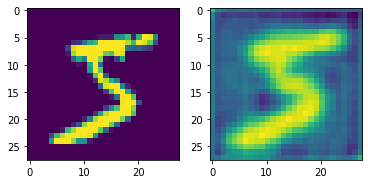

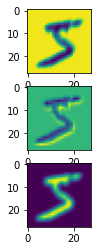

In [ ]:
# Plot some images
idx = torch.randint(0, output.size(0), ())
pred = normalize_output(output[idx, 0])
img = data[idx, 0]

fig, axarr = plt.subplots(1, 2)
axarr[0].imshow(img.detach().numpy())
axarr[1].imshow(pred.detach().numpy())

# Visualize feature maps
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

model.conv1.register_forward_hook(get_activation('conv2'))
data, _ = dataset[0]
data.unsqueeze_(0)
output = model(data)

act = activation['conv2'].squeeze()
fig, axarr = plt.subplots(act.size(0))
for idx in range(act.size(0)):
    axarr[idx].imshow(act[idx])

In [ ]:
Filter visualisation
Layer visulaisation
Weight visulaisaiton

https://github.com/utkuozbulak/pytorch-cnn-visualizations

https://towardsdatascience.com/visualizing-convolution-neural-networks-using-pytorch-3dfa8443e74e

https://docs.fast.ai/callbacks.hooks.html#hook_output

https://www.youtube.com/watch?v=RNnKtNrsrmg&feature=youtu.be